In [1]:
import os

In [2]:
computation = 'cloud'

In [3]:
if computation == 'local' :
  data_path = '../data/transaction_fraud/'
  global_model_path = '../models/globalmodel'
  ensemble_model_path = '../models/ensemblemodel_2'
  lof_database_save_path = '../models/lof_database'
  customer_frequency_rating_path = '../models/customer_fr_database'
  merchant_frequency_rating_path = '../models/merchant_fr_database'
else :
  !pip install river
  !pip install imblearn
  !pip install xgboost
  from google.colab import drive
  drive.mount('/content/drive')
  data_path = '/content/drive/MyDrive/uco_fraud_detector/data/transaction_fraud/'
  global_model_path = '/content/drive/MyDrive/uco_fraud_detector/models/globalmodel'
  ensemble_model_path = '/content/drive/MyDrive/uco_fraud_detector/models/ensemblemodel_2'
  lof_database_save_path = '/content/drive/MyDrive/uco_fraud_detector/models/lof_database'
  customer_frequency_rating_path = '/content/drive/MyDrive/uco_fraud_detector/models/customer_fr_database'
  merchant_frequency_rating_path = '/content/drive/MyDrive/uco_fraud_detector/models/merchant_fr_database'

print(f'Searching for file : ',{'found' if os.path.exists(data_path) else 'not found'})
print(os.listdir(data_path))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 96.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.1 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.1 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.1 which is incompatible.
Mounted at /content/drive
Searching for file :  {'found'}
['bs140513_032310.csv', 'bsNET140513_032310.csv']


In [4]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from river.anomaly import LocalOutlierFactor

In [8]:
df = pd.read_csv(data_path + os.listdir(data_path)[0])
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [9]:
global_model = pickle.load(open(global_model_path , 'rb'))
ensemble_model = pickle.load(open(ensemble_model_path , 'rb'))
lof_database = pickle.load(open(lof_database_save_path , 'rb'))
customer_frequency_rating = pickle.load(open(customer_frequency_rating_path , 'rb'))
merchant_frequency_rating = pickle.load(open(merchant_frequency_rating_path , 'rb'))

505445

## data preprocessing

In [11]:
# removing quotations from the datasets
for c in df.columns :
    if df[c].dtype==object :
        df[c] = df[c].replace("'","", regex = True)
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0


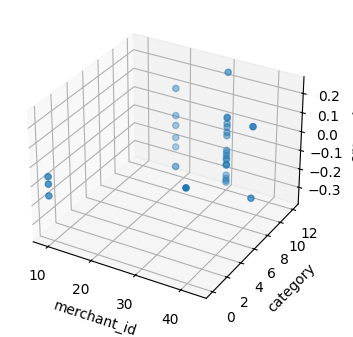

In [ ]:
# for account C478503155
# data = lof_database['C478503155'].x_list
# data_df = pd.DataFrame(data)
# ## 3d graph of the data
# fig = plt.figure(figsize = (6,4))
# ax = plt.axes(projection='3d')
# ax.scatter3D(data_df['merchant_id'], data_df['category'], data_df['amount'])
# ax.set_xlabel('merchant_id')
# ax.set_ylabel('category')
# ax.set_zlabel('amount')
# plt.show()